## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

In [2]:
import json
from collections import defaultdict

with open('data/hw4_data.json', 'r') as f:
    data = json.load(f)

adj_dict = defaultdict(list)  # 使用字典存储每个用户的邻居和关系权重
for e in data['edges']:
    user1, user2, weight = e
    # 无向图
    adj_dict[user1].append((user2, weight))
    adj_dict[user2].append((user1, weight))  

print("字典表示法:")
for user, friends in adj_dict.items():
    print(f"{user}: {friends}")

字典表示法:
Yanyan-Wang: [('Aarebecca', 25.3), ('pomelo-nwu', 25.09), ('yangzy0603', 11.85), ('tyn1998', 9.62), ('yvonneyx', 7.39), ('lidongze0629', 7.25), ('RackweLLizm', 4.5), ('yikenie', 4.25), ('yubo0923', 3.61), ('Maple0817', 3.11), ('wj23027', 2.34), ('frank-zsy', 2.1), ('andyhuang18', 1.14), ('bifenglin', 0.86)]
Aarebecca: [('Yanyan-Wang', 25.3), ('pomelo-nwu', 24.84), ('yangzy0603', 11.92), ('yvonneyx', 7.73), ('lidongze0629', 6.58), ('tyn1998', 6.4), ('RackweLLizm', 4.84), ('yikenie', 4.55), ('yubo0923', 3.82), ('Maple0817', 3.27), ('frank-zsy', 0.97)]
pomelo-nwu: [('Yanyan-Wang', 25.09), ('Aarebecca', 24.84), ('yangzy0603', 13.85), ('tyn1998', 12.48), ('lidongze0629', 8.1), ('yvonneyx', 7.63), ('RackweLLizm', 4.97), ('yikenie', 4.66), ('bifenglin', 4.11), ('frank-zsy', 3.96), ('yubo0923', 3.9), ('wj23027', 3.86), ('andyhuang18', 3.56), ('Maple0817', 3.32), ('will-ww', 3.27), ('zhicheng-ning', 2.52), ('PureNatural', 2.36), ('xiaoya-yaya', 2.24), ('xgdyp', 2.1), ('longyanz', 2.1), (

In [3]:
# 找出每个用户的直接朋友
direct_friends = {user: [friend for friend, _ in friends] for user, friends in adj_dict.items()}

# 输出每个用户的直接朋友
print("\n每个用户的直接朋友:")
for user, friends in direct_friends.items():
    print(f"{user}: {friends}")


每个用户的直接朋友:
Yanyan-Wang: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
andyhuang18: ['tyn1998', 'wj23027', 'will-ww', 'zhicheng-ning', 'lhbvvvvv', 'frank-zsy', 'bifenglin', 'wxharry', 'Zzzzzhuzhiwei', 'stevending1st', 'PureNatural', 'pranavshuklaa', 'pomelo-nwu', 'stealth-bombeer', 'Vlad116', 'kunal8411', 'xgdyp', 'longyanz', 'xiaoya-yaya', 'zhaosj975', 'birdflyi', 'Yanya

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

In [4]:
# 计算每个用户的度数（直接朋友数量）
user_degrees = {user: len(friends) for user, friends in direct_friends.items()}
# 找出度数最多的前5个用户
top_5_by_degree = sorted(user_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
print("度数最多的前5个用户及朋友数量:")
for user, degree in top_5_by_degree:
    print(f"{user}: {degree} 位朋友")

度数最多的前5个用户及朋友数量:
tyn1998: 30 位朋友
frank-zsy: 30 位朋友
pomelo-nwu: 24 位朋友
andyhuang18: 23 位朋友
wj23027: 23 位朋友


In [5]:
# 找出影响力最高的前5个用户
user_influence = {node[0]: node[1] for node in data['nodes']}
top_5_by_influence = sorted(user_influence.items(), key=lambda x: x[1], reverse=True)[:5]

print("\n影响力最高的前5个用户:")
for user, influence in top_5_by_influence:
    print(f"{user}: 影响力分数 {influence}")


影响力最高的前5个用户:
Yanyan-Wang: 影响力分数 50.95
Aarebecca: 影响力分数 23.82
pomelo-nwu: 影响力分数 22.36
tyn1998: 影响力分数 16.64
frank-zsy: 影响力分数 15.8


In [6]:
# 综合影响力得分 (影响力得分50% + 朋友数量50%)
combined_influence = {user: 0.5 * user_influence.get(user, 0) + 0.5 * user_degrees.get(user, 0) 
                      for user in user_influence.keys()}

# 找出综合影响力最高的前5个用户
top_5_by_combined_influence = sorted(combined_influence.items(), key=lambda x: x[1], reverse=True)[:5]

print("\n综合影响力最高的前5个用户（影响力得分50% + 朋友数量50%）:")
for user, score in top_5_by_combined_influence:
    print(f"{user}: 综合得分 {score}")



综合影响力最高的前5个用户（影响力得分50% + 朋友数量50%）:
Yanyan-Wang: 综合得分 32.475
tyn1998: 综合得分 23.32
pomelo-nwu: 综合得分 23.18
frank-zsy: 综合得分 22.9
Aarebecca: 综合得分 17.41


#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。

In [7]:
target_user = "Yanyan-Wang"

# 获取Yanyan-Wang的直接朋友
friends1 = set(direct_friends.get(target_user, []))

# 统计朋友的朋友
potential_new_friends = defaultdict(int)
for friend in friends1:
    friends_of_friend = set(direct_friends.get(friend, []))
    for fof in friends_of_friend:
        if fof != target_user and fof not in friends1:  # 排除Yanyan-Wang和其直接朋友
            potential_new_friends[fof] += 1  # 统计共同朋友数量

# 找出朋友的朋友中最有可能成为新朋友的用户（共同朋友最多）
recommended_new_friends = sorted(potential_new_friends.items(), key=lambda x: x[1], reverse=True)

print(f"推荐给 {target_user} 的新朋友及推荐理由:")
for user, mutual_friends in recommended_new_friends:
    print(f"{user}: 有 {mutual_friends} 个共同朋友")


推荐给 Yanyan-Wang 的新朋友及推荐理由:
Zzzzzhuzhiwei: 有 6 个共同朋友
lhbvvvvv: 有 6 个共同朋友
longyanz: 有 6 个共同朋友
birdflyi: 有 6 个共同朋友
xgdyp: 有 6 个共同朋友
zhaosj975: 有 6 个共同朋友
xiaoya-yaya: 有 6 个共同朋友
zhicheng-ning: 有 6 个共同朋友
PureNatural: 有 6 个共同朋友
will-ww: 有 6 个共同朋友
stevending1st: 有 5 个共同朋友
wxharry: 有 4 个共同朋友
stealth-bombeer: 有 4 个共同朋友
pranavshuklaa: 有 4 个共同朋友
Vlad116: 有 4 个共同朋友
kunal8411: 有 4 个共同朋友


In [8]:
# 计算与Yanyan-Wang连接强度的用户
connection_strengths = defaultdict(float)
for edge in data['edges']:
    user1, user2, weight = edge
    if user1 == target_user:
        connection_strengths[user2] = weight
    elif user2 == target_user:
        connection_strengths[user1] = weight

# 按连接强度排序，找出强度最高的5个用户
top_5_by_strength = sorted(connection_strengths.items(), key=lambda x: x[1], reverse=True)[:5]

print(f"\n与 {target_user} 连接强度最高的前5个用户:")
for user, strength in top_5_by_strength:
    print(f"{user}: 连接强度 {strength}")



与 Yanyan-Wang 连接强度最高的前5个用户:
Aarebecca: 连接强度 25.3
pomelo-nwu: 连接强度 25.09
yangzy0603: 连接强度 11.85
tyn1998: 连接强度 9.62
yvonneyx: 连接强度 7.39


#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

C:\Users\tommy\AppData\Local\Temp\ipykernel_14304\3604136048.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Influence Score")


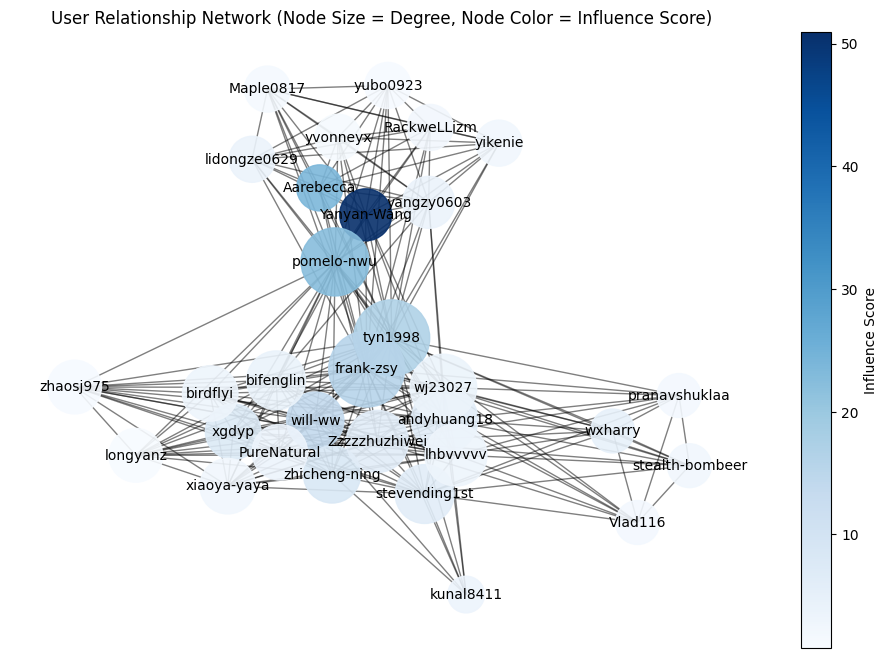

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

# 添加节点和边
for node, influence in user_influence.items():
    G.add_node(node, influence=influence)  # 添加用户节点，带有影响力分数属性

for edge in data['edges']:
    user1, user2, weight = edge
    G.add_edge(user1, user2, weight=weight)  # 添加用户之间的连接，带有权重属性

# 获取节点的度数和影响力
node_degrees = dict(G.degree())
node_influence = {node: G.nodes[node]['influence'] for node in G.nodes()}

# 根据度数调整节点大小
node_sizes = [node_degrees[node] * 100 for node in G.nodes()]  # 放大尺寸，便于可视化

# 根据影响力得分调整节点颜色
node_colors = [node_influence[node] for node in G.nodes()]

# 绘制图
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# 绘制节点，按影响力着色，按度数调整大小
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Blues, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# 添加颜色条表示影响力得分
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label="Influence Score")

plt.title("User Relationship Network (Node Size = Degree, Node Color = Influence Score)")
plt.axis('off')
plt.show()